# Basis imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from matplotlib.lines import Line2D

def load_excel_data(file_path: str) -> pd.DataFrame:
    """
    Lade eine Excel-Datei und gebe die Daten als DataFrame zurück.
    """
    return pd.read_excel(file_path, sheet_name="Questions")


# Ausführbarkeit und Effizienz

## Effizienz der SQL-Abfragen

In [2]:
daten_PlanTime = {
    "Eigene": 60.24,
    "Mistral Small 3.2": 16.71,
    "Gemma 3 27B": 2.68,
    "GPT-4.1 mini": 23.94,
}
daten_ExecutionTime = {
    "Eigene": 6739.72,
    "Mistral Small 3.2": 9769.47,
    "Gemma 3 27B": 3335.71,
    "GPT-4.1 mini": 5683.28
}


In [3]:
df_plantime = pd.DataFrame([daten_PlanTime])
df_executiontime = pd.DataFrame([daten_ExecutionTime])

In [5]:
farben = {
    "Eigene": "#4aa0de",
    "Mistral Small 3.2": "#455681",
    "Gemma 3 27B": "#2d827e",
    "GPT-4.1 mini": "#6cbc6e"
}
hue_order = list(farben.keys())

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1020256797.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plantime.melt(), x="variable", y="value",hue_order=hue_order, palette=farben, ci=None)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1020256797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plantime.melt(), x="variable", y="value",hue_order=hue_order, palette=farben, ci=None)


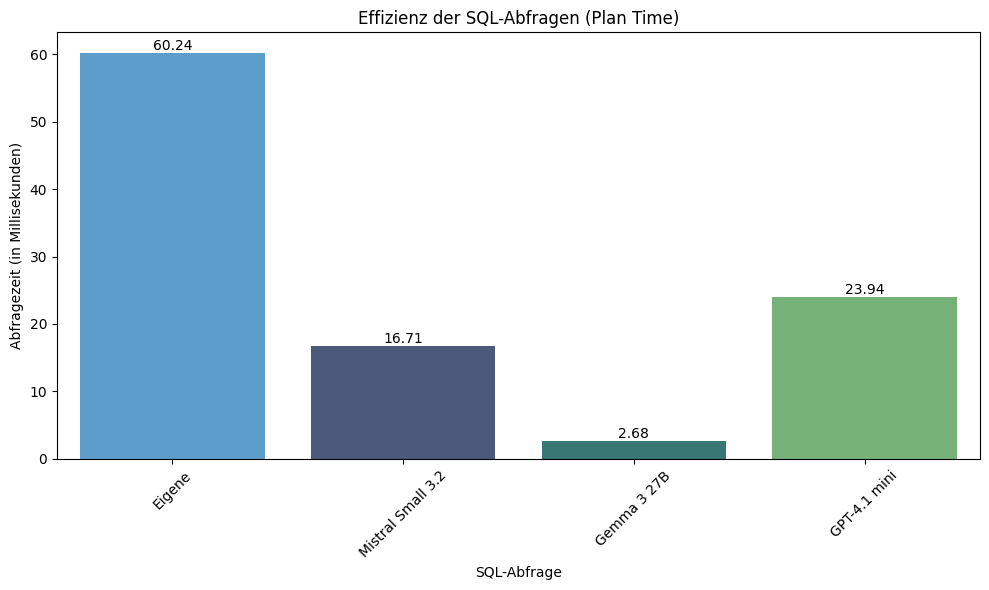

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plantime.melt(), x="variable", y="value",hue_order=hue_order, palette=farben, ci=None)
for container in plt.gca().containers:
	plt.bar_label(container)
plt.title("Effizienz der SQL-Abfragen (Plan Time)")
plt.ylabel("Abfragezeit (in Millisekunden)")
plt.xlabel("SQL-Abfrage")
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1147796966.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_executiontime.melt(), x="variable", y="value", hue_order=hue_order, palette=farben, ci=None)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1147796966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_executiontime.melt(), x="variable", y="value", hue_order=hue_order, palette=farben, ci=None)


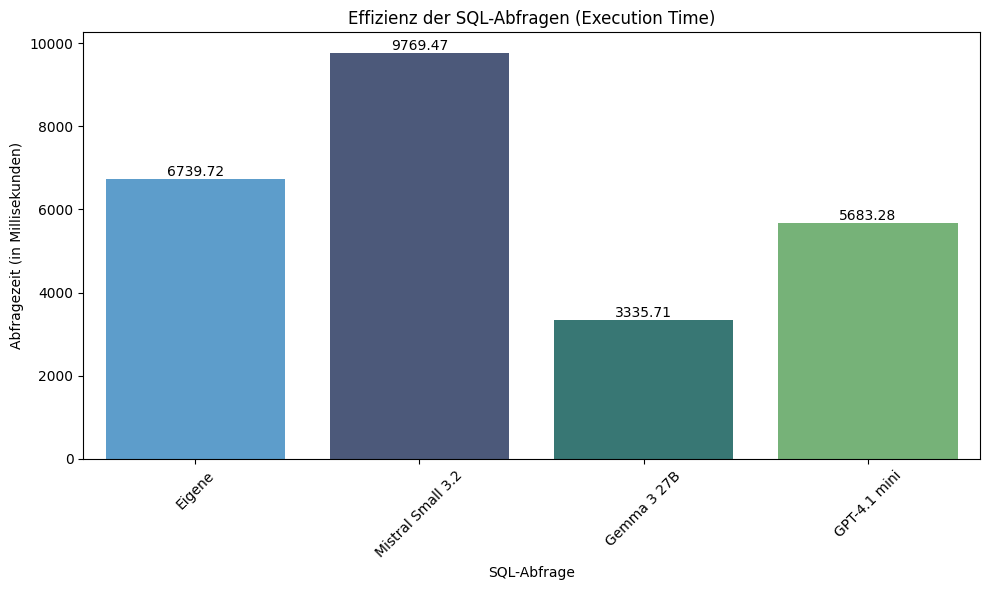

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_executiontime.melt(), x="variable", y="value", hue_order=hue_order, palette=farben, ci=None)
for container in plt.gca().containers:
	plt.bar_label(container)
plt.title("Effizienz der SQL-Abfragen (Execution Time)")
plt.ylabel("Abfragezeit (in Millisekunden)")
plt.xlabel("SQL-Abfrage")
plt.xticks(rotation=45)
plt.tight_layout()

## Ausführbarkeit

In [18]:
df = load_excel_data("../questions/questions.xlsx")
df = df[:-1]

In [11]:
df.columns

Index(['Frage', 'GoldenSQL', 'GoldenDaten', 'GoldenPlanTime',
       'GoldenExecutionTime', 'MistralSQL', 'MistralDaten', 'MistralPlanTime',
       'MistralExecutionTime', 'GoogleSQL', 'GoogleDaten', 'GooglePlanTime',
       'GoogleExecutionTime', 'OpenaiSQL', 'OpenaiDaten', 'OpenaiPlanTime',
       'OpenaiExecutionTime', 'MistralInterpretation', 'MistralVotes',
       'MistralScore', 'GoogleInterpretation', 'GoogleVotes', 'GoogleScore',
       'OpenaiInterpretation', 'OpenaiVotes', 'OpenaiScore', 'Reasoning',
       'MistralSQLSemanticVotes', 'MistralSQLSemanticScore',
       'MistralSQLSemanticReasoning', 'GoogleSQLSemanticVotes',
       'GoogleSQLSemanticScore', 'GoogleSQLSemanticReasoning',
       'OpenaiSQLSemanticVotes', 'OpenaiSQLSemanticScore',
       'OpenaiSQLSemanticReasoning', 'Precision_Mistral', 'Precision_Google',
       'Precision_OpenAI', 'Recall_Mistral', 'Recall_Google', 'Recall_OpenAI',
       'has_window', 'has_gapfill', 'has_time_bucket', 'has_stats_agg',
       '

In [19]:
df_ausführbarkeit = df[["GoldenDaten", "MistralDaten", "GoogleDaten", "OpenaiDaten", "score_bin"]]

In [20]:
df_ausführbarkeit.head()

,GoldenDaten,MistralDaten,GoogleDaten,OpenaiDaten,score_bin
0,"[{'month': Timestamp('2024-01-01 00:00:00'), '...","[{'month': 1.0, 'delayed_departures': 6702}, {...","[{'month': datetime.date(2024, 1, 1), 'delayed...","[{'month': datetime.datetime(2024, 1, 1, 0, 0,...",mittel
1,"[{'time': Timestamp('2025-01-18 00:34:00'), 't...","[{'max_arrival_delay': 1440}, {'max_arrival_de...",[{'max': 1442}],[{'longest_delay_minutes': 1443}],mittel
2,"[{'time': Timestamp('2024-02-02 08:19:00'), 't...","[{'state': 'Salzburg', 'max_delay_minutes': 14...","[{'state': 'Salzburg', 'max_delay': 1450}, {'s...","[{'state': 'Salzburg', 'max_delay_minutes': 14...",schwer
3,"[{'time': Timestamp('2023-12-25 00:33:00'), 't...",(psycopg2.errors.DiskFull) could not resize sh...,"[{'district': 'Salzburg-Umgebung', 'max_delay'...","[{'district': 'Krems(Land)', 'max_delay_minute...",schwer
4,"[{'month': Timestamp('2023-09-01 00:00:00'), '...",[{'station': 'Berndorf/Triesting Stadt Bahnhof...,[{'avg': 1.0271945916869119}],[{'punctuality_rate': 0.7540144408834344}],leicht


In [21]:
# if they dont start with [{ than its an error and therfore a 0 make a new column for each model
df_ausführbarkeit["Eigen_Ausführung"] = df_ausführbarkeit["GoldenDaten"].apply(lambda x: 1 if str(x).startswith("[{") else 1 if pd.isna(x) else 0)
df_ausführbarkeit["Mistral_Ausführung"] = df_ausführbarkeit["MistralDaten"].apply(lambda x: 1 if str(x).startswith("[{") else 1 if pd.isna(x) else 0)
df_ausführbarkeit["Google_Ausführung"] = df_ausführbarkeit["GoogleDaten"].apply(lambda x: 1 if str(x).startswith("[{") else 1 if pd.isna(x) else 0)
df_ausführbarkeit["Openai_Ausführung"] = df_ausführbarkeit["OpenaiDaten"].apply(lambda x: 1 if str(x).startswith("[{") else 1 if pd.isna(x) else 0)


C:\Users\samue\AppData\Local\Temp\ipykernel_32328\719579796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ausführbarkeit["Eigen_Ausführung"] = df_ausführbarkeit["GoldenDaten"].apply(lambda x: 1 if str(x).startswith("[{") else 1 if pd.isna(x) else 0)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\719579796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ausführbarkeit["Mistral_Ausführung"] = df_ausführbarkeit["MistralDaten"].apply(lambda x: 1 if str(x).startswith("[{") else 1 if pd.isna(x)

In [22]:
df_ausführbarkeit.head(80)

,GoldenDaten,MistralDaten,GoogleDaten,OpenaiDaten,score_bin,Eigen_Ausführung,Mistral_Ausführung,Google_Ausführung,Openai_Ausführung
0,"[{'month': Timestamp('2024-01-01 00:00:00'), '...","[{'month': 1.0, 'delayed_departures': 6702}, {...","[{'month': datetime.date(2024, 1, 1), 'delayed...","[{'month': datetime.datetime(2024, 1, 1, 0, 0,...",mittel,1,1,1,1
1,"[{'time': Timestamp('2025-01-18 00:34:00'), 't...","[{'max_arrival_delay': 1440}, {'max_arrival_de...",[{'max': 1442}],[{'longest_delay_minutes': 1443}],mittel,1,1,1,1
2,"[{'time': Timestamp('2024-02-02 08:19:00'), 't...","[{'state': 'Salzburg', 'max_delay_minutes': 14...","[{'state': 'Salzburg', 'max_delay': 1450}, {'s...","[{'state': 'Salzburg', 'max_delay_minutes': 14...",schwer,1,1,1,1
3,"[{'time': Timestamp('2023-12-25 00:33:00'), 't...",(psycopg2.errors.DiskFull) could not resize sh...,"[{'district': 'Salzburg-Umgebung', 'max_delay'...","[{'district': 'Krems(Land)', 'max_delay_minute...",schwer,1,0,1,1
4,"[{'month': Timestamp('2023-09-01 00:00:00'), '...",[{'station': 'Berndorf/Triesting Stadt Bahnhof...,[{'avg': 1.0271945916869119}],[{'punctuality_rate': 0.7540144408834344}],leicht,1,1,1,1
...,...,...,...,...,...,...,...,...,...
75,"[{'time': Timestamp('2024-01-01 00:00:00'), 'd...","[{'day_type': 'Weekday', 'avg_arrival_delay': ...",NaN,"[{'day_type': 'weekday', 'total_arrivals': 452...",schwer,1,1,1,1
76,"[{'time': Timestamp('2025-01-01 00:00:00'), 'a...",NaN,NaN,NaN,leicht,1,1,1,1
77,"[{'city': 'Hall in Tirol', 'weekday': 'Sunday ...",NaN,(psycopg2.errors.SyntaxError) syntax error at ...,"[{'city': 'Hall in Tirol', 'weekday': 0.0, 'av...",mittel,1,1,0,1
78,"[{'week': Timestamp('2025-04-28 00:00:00'), 'a...",NaN,NaN,"[{'week': Timestamp('2025-04-28 00:00:00'), 'a...",leicht,1,1,1,1


In [23]:
farben = {
    "Eigene": "#4aa0de",   # Blau
    "Mistral Small 3.2": "#455681",    # Orange
    "Gemma 3 27B": "#2d827e",         # Grün
    "GPT-4.1 mini": "#6cbc6e"          # Rot
}
hue_order = list(farben.keys())

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1080473839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_counts.index, y=success_counts.values, hue_order=hue_order, palette=farben)


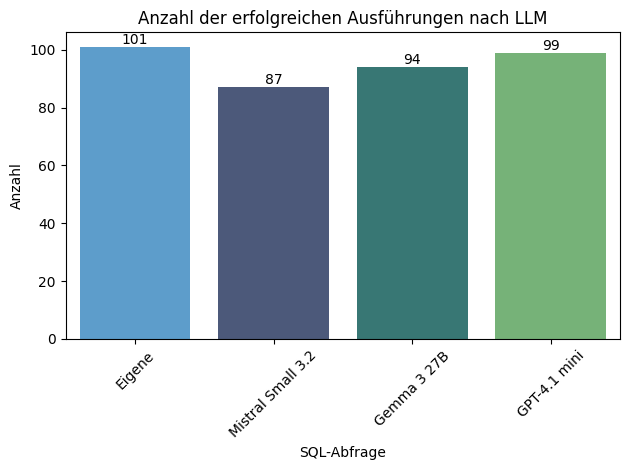

In [24]:
success_counts = df_ausführbarkeit[["Eigen_Ausführung", "Mistral_Ausführung", "Google_Ausführung", "Openai_Ausführung"]].sum().rename({"Eigen_Ausführung": "Eigene", "Mistral_Ausführung": "Mistral Small 3.2", "Google_Ausführung": "Gemma 3 27B", "Openai_Ausführung": "GPT-4.1 mini"})
sns.barplot(x=success_counts.index, y=success_counts.values, hue_order=hue_order, palette=farben)
plt.ylabel('Anzahl')
plt.xlabel('SQL-Abfrage')
plt.title('Anzahl der erfolgreichen Ausführungen nach LLM')
plt.xticks(rotation=45)
for i, v in enumerate(success_counts.values):
    plt.text(i, v + 1, str(v), ha='center')
plt.tight_layout()
plt.show()

In [25]:
success_percentages = (success_counts / 101) * 100
for data in zip(success_counts.index, success_percentages):
    print(f"{data[0]}: {data[1]:.2f}%")

Eigene: 100.00%
Mistral Small 3.2: 86.14%
Gemma 3 27B: 93.07%
GPT-4.1 mini: 98.02%


C:\Users\samue\AppData\Local\Temp\ipykernel_32328\783678704.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["score_bin", "LLM"], as_index=False)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\783678704.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=summary_fail, x="score_bin", y="Fehlversuche", hue="LLM", hue_order=hue_order, palette=farben, ci=None)


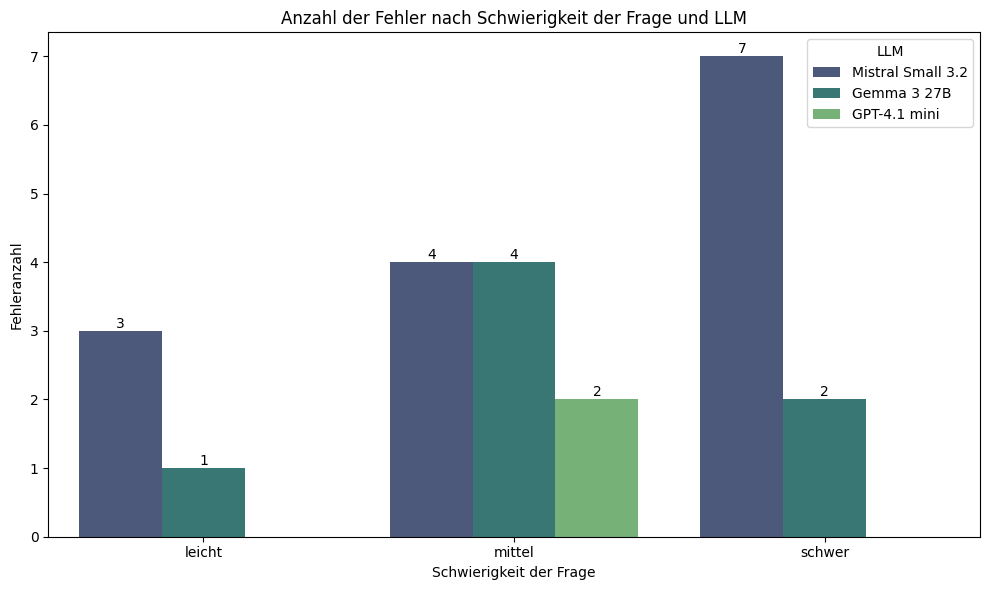

,score_bin,LLM,Fehlversuche
0,leicht,GPT-4.1 mini,0
1,leicht,Gemma 3 27B,1
2,leicht,Mistral Small 3.2,3
3,mittel,GPT-4.1 mini,2
4,mittel,Gemma 3 27B,4
5,mittel,Mistral Small 3.2,4
6,schwer,GPT-4.1 mini,0
7,schwer,Gemma 3 27B,2
8,schwer,Mistral Small 3.2,7


In [26]:
# Folgender Code wurde mit Hilfe von Copilot erstellt
# Dieser Code Plotet die Anzahl der Fehlversuche (Erfolg==0) pro score_bin und LLM als gruppierte Balken
ausfuehrungen = {"Eigen_Ausführung": "Eigene SQL-Abfrage", 
                 "Mistral_Ausführung": "Mistral Small 3.2", 
                 "Google_Ausführung": "Gemma 3 27B", 
                 "Openai_Ausführung": "GPT-4.1 mini"}

# Langformat: Erfolg (0/1) je LLM und score_bin
cols = list(ausfuehrungen.keys())
long_df = (
    df_ausführbarkeit
    .melt(id_vars=["score_bin"], value_vars=cols, var_name="Modell_raw", value_name="Erfolg")
)
long_df["LLM"] = long_df["Modell_raw"].map(ausfuehrungen)

# Feste Farben pro LLM
farben = {
    #"Eigene SQL-Abfrage": "#4aa0de",   # Blau
    "Mistral Small 3.2": "#455681",    # Orange
    "Gemma 3 27B": "#2d827e",         # Grün
    "GPT-4.1 mini": "#6cbc6e"          # Rot
}
hue_order = list(farben.keys())

# score_bin als geordnete Kategorie (optional) für saubere Achsenreihenfolge
try:
    ordered_bins = sorted(pd.unique(long_df["score_bin"].dropna()))
    long_df["score_bin"] = pd.Categorical(long_df["score_bin"], categories=ordered_bins, ordered=True)
except Exception:
    pass

# Nur Fehlversuche (Erfolg == 0) zählen
summary_fail = (
    long_df[long_df["Erfolg"] == 0]
    .groupby(["score_bin", "LLM"], as_index=False)
    .size()
    .rename(columns={"size": "Fehlversuche"})
)

# Diagramm: gruppierte Balken nach score_bin (x) und LLM (Hue) – Anzahl der Fehlversuche
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_fail, x="score_bin", y="Fehlversuche", hue="LLM", hue_order=hue_order, palette=farben, ci=None)
plt.title("Anzahl der Fehler nach Schwierigkeit der Frage und LLM")
plt.xlabel("Schwierigkeit der Frage")
plt.ylabel("Fehleranzahl")
plt.xticks(rotation=0)

# Werte auf die Balken schreiben und wenn 0 dann nichts
for p in plt.gca().patches:
    if p.get_height() == 0:
        plt.annotate("", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    else:
        plt.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.tight_layout()
plt.show()

# Optional: Rohwerte als Tabelle für Nachvollziehbarkeit anzeigen
summary_fail.sort_values(["score_bin", "LLM"])

### Fehler

In [25]:
# Filter MistralDaten, GoogleDaten und OpenAIDaten to only keep (psycopg2)
df_fehler = df_ausführbarkeit[["MistralDaten", "GoogleDaten", "OpenaiDaten"]]


In [26]:
df_fehler.head(30)

,MistralDaten,GoogleDaten,OpenaiDaten
0,"[{'month': 1.0, 'delayed_departures': 6702}, {...","[{'month': datetime.date(2024, 1, 1), 'delayed...","[{'month': datetime.datetime(2024, 1, 1, 0, 0,..."
1,"[{'max_arrival_delay': 1440}, {'max_arrival_de...",[{'max': 1442}],[{'longest_delay_minutes': 1443}]
2,"[{'state': 'Salzburg', 'max_delay_minutes': 14...","[{'state': 'Salzburg', 'max_delay': 1450}, {'s...","[{'state': 'Salzburg', 'max_delay_minutes': 14..."
3,(psycopg2.errors.DiskFull) could not resize sh...,"[{'district': 'Salzburg-Umgebung', 'max_delay'...","[{'district': 'Krems(Land)', 'max_delay_minute..."
4,[{'station': 'Berndorf/Triesting Stadt Bahnhof...,[{'avg': 1.0271945916869119}],[{'punctuality_rate': 0.7540144408834344}]
5,"[{'departuredate': datetime.date(2025, 6, 27),...",[{'avg': None}],"[{'average_delay_minutes': 2.1043956453379633,..."
6,[{'average_departure_delay': 4.776171774667959}],[{'avg': 1.0900389312479897}],[{'average_delay_minutes': 1.0558188953263843}]
7,(psycopg2.errors.QueryCanceled) canceling stat...,"[{'traintype': '', 'avg': 5.029411764705882}, ...","[{'traintype': '', 'average_delay_minutes': 4...."
8,[{'total_cancellations': 66449}],[{'count': 66448}],[{'cancellations_count': 132810}]
9,"[{'total_cancellations': 36044}, {'total_cance...",[{'count': 36044}],[{'cancellations_count': 36535}]


In [33]:
# Fehler-Extraktion und Zählung
# In Long-Form bringen und nur Fehler behalten (nicht mit "[{" beginnend)
# Folgender Code wurde mit Hilfe von Copilot erstellt

mapping = {
    "MistralDaten": "Mistral Small 3.2",
    "GoogleDaten": "Gemma 3 27B",
    "OpenaiDaten": "GPT-4.1 mini"
}

df_errors_long = (
    df_fehler
    .melt(var_name="LLM", value_name="Nachricht")
    .dropna(subset=["Nachricht"])
)

mask_error = ~df_errors_long["Nachricht"].astype(str).str.startswith("[{")
df_errors_long = df_errors_long[mask_error].copy()
def extract_error_type(msg: str) -> str:
    s = str(msg)
    # psycopg2 Fehlerklasse extrahieren, falls vorhanden
    m = re.search(r"psycopg2\.errors\.([A-Za-z0-9_]+)", s)
    if m:
        return m.group(1)
    # Generische *Error Namen (z.B. SyntaxError, ValueError)
    m = re.search(r"([A-Za-z_][A-Za-z0-9_]*Error)", s)
    if m:
        return m.group(1)
    # Postgres-Fehler beginnen oft mit ERROR:
    if s.upper().startswith("ERROR"):
        return "ERROR"
    # Fallback: Teil vor dem ersten Doppelpunkt oder erste 60 Zeichen
    head = s.split(":", 1)[0]
    return head[:60]

# Fehlertyp bestimmen
df_errors_long["Fehlertyp"] = df_errors_long["Nachricht"].apply(extract_error_type)

# Zählung pro Fehlertyp und Modell
auswertung_errors = (
    df_errors_long
    .groupby(["Fehlertyp", "LLM"])  # Gruppieren
    .size()
    .reset_index(name="Anzahl")
    .sort_values(["Anzahl", "Fehlertyp"], ascending=[False, True])
).replace({"LLM": mapping})  # Modellnamen ersetzen

# Vorschau
auswertung_errors.head(20)

,Fehlertyp,LLM,Anzahl
6,SyntaxError,Mistral Small 3.2,5
4,QueryCanceled,Mistral Small 3.2,2
8,UndefinedFunction,Mistral Small 3.2,2
10,UndefinedTable,Gemma 3 27B,2
12,could not convert string to float,Mistral Small 3.2,2
0,DiskFull,Gemma 3 27B,1
1,DiskFull,Mistral Small 3.2,1
2,GroupingError,Gemma 3 27B,1
3,InvalidTextRepresentation,Mistral Small 3.2,1
5,SyntaxError,Gemma 3 27B,1


In [34]:
farben = {
    #"Eigene SQL-Abfrage": "#4aa0de",   # Blau
    "Mistral Small 3.2": "#455681",    # Orange
    "Gemma 3 27B": "#2d827e",         # Grün
    "GPT-4.1 mini": "#6cbc6e"          # Rot
}
hue_order = list(farben.keys())

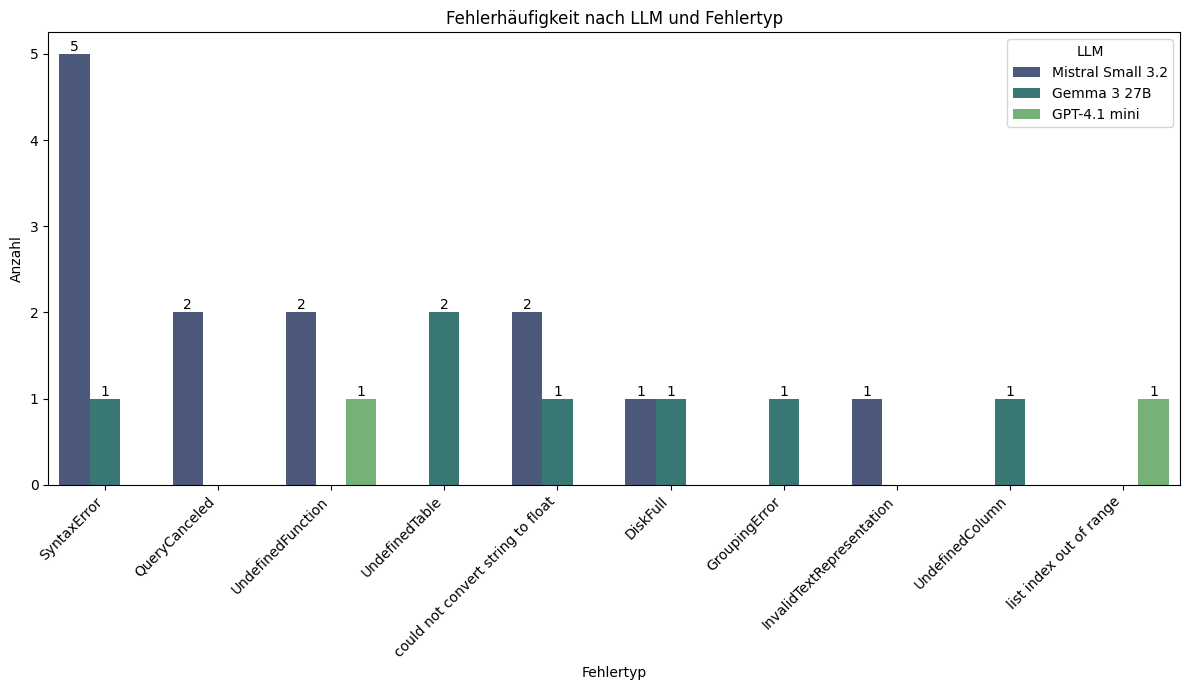

In [35]:
plt.figure(figsize=(12, 7))
top_types = (
    auswertung_errors.groupby("Fehlertyp")["Anzahl"].sum()
    .sort_values(ascending=False)
    .index
)
plot_df = auswertung_errors[auswertung_errors["Fehlertyp"].isin(top_types)]

sns.barplot(
    data=plot_df,
    x="Fehlertyp",
    y="Anzahl", 
    hue="LLM", 
    hue_order=hue_order, 
    palette=farben
)
plt.title("Fehlerhäufigkeit nach LLM und Fehlertyp")
plt.xlabel("Fehlertyp")
plt.ylabel("Anzahl")
plt.xticks(rotation=45, ha="right")
# diese for Schleife für die Anzahl wurde mit Hilfe von Copilot erstellt
for p in plt.gca().patches:
    if p.get_height() == 0:
        plt.annotate("", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    else:
        plt.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.tight_layout()
plt.show()

## Boxplots

In [27]:
df_boxplot = df[["GoldenPlanTime", "GoldenExecutionTime", "MistralPlanTime", "MistralExecutionTime", "GooglePlanTime", "GoogleExecutionTime", "OpenaiPlanTime", "OpenaiExecutionTime", "score_bin"]]

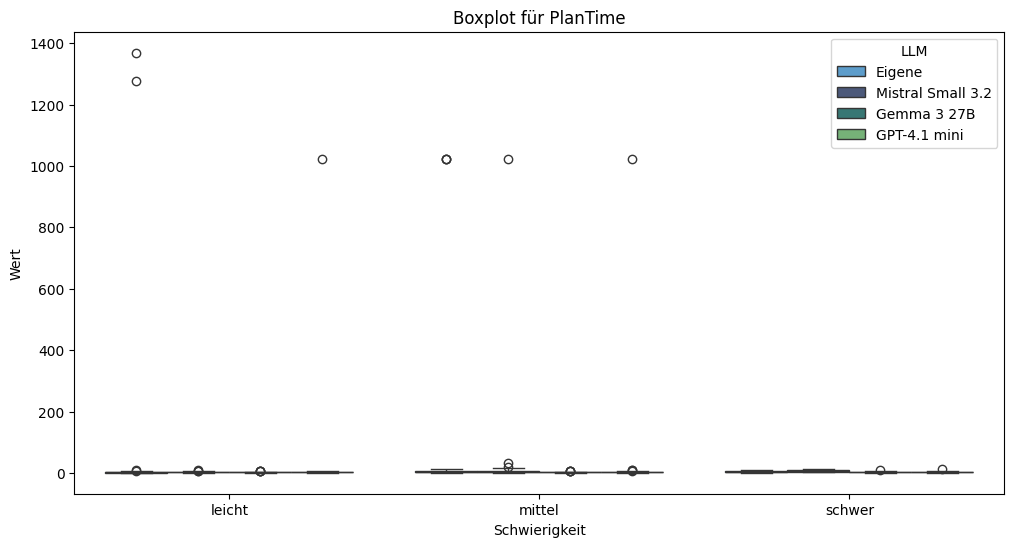

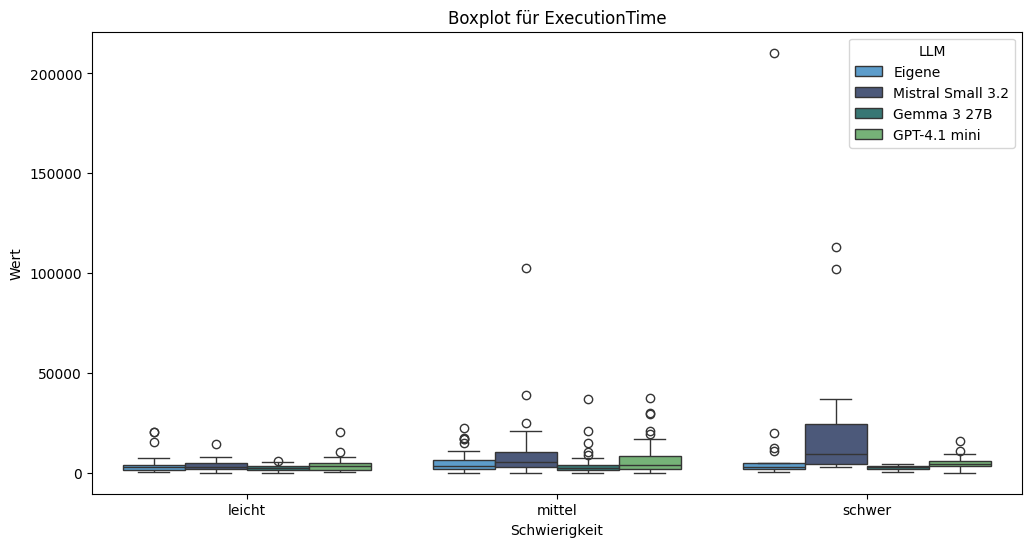

In [28]:
model_map = {
    "GoldenPlanTime": ("Eigene", "PlanTime"),
    "GoldenExecutionTime": ("Eigene", "ExecutionTime"),
    "MistralPlanTime": ("Mistral Small 3.2", "PlanTime"),
    "MistralExecutionTime": ("Mistral Small 3.2", "ExecutionTime"),
    "GooglePlanTime": ("Gemma 3 27B", "PlanTime"),
    "GoogleExecutionTime": ("Gemma 3 27B", "ExecutionTime"),
    "OpenaiPlanTime": ("GPT-4.1 mini", "PlanTime"),
    "OpenaiExecutionTime": ("GPT-4.1 mini", "ExecutionTime"),
}
liste = []
for _, row in df_boxplot.iterrows():
    diff = row.get("score_bin", np.nan)
    for col, (model, metric) in model_map.items():
        val = row.get(col, np.nan)
        if pd.notnull(val):
            liste.append({"Schwierigkeit": diff, "LLM": model, "Metric": metric, "Value": float(val)})

order_schwierigkeit = ["leicht", "mittel", "schwer"]
order_llm = ["Eigene", "Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"]

df_boxplot = pd.DataFrame(liste)
df_boxplot["Schwierigkeit"] = pd.Categorical(df_boxplot["Schwierigkeit"], categories=order_schwierigkeit, ordered=True)
df_boxplot["LLM"] = pd.Categorical(df_boxplot["LLM"], categories=order_llm, ordered=True)
farben = {
    "Eigene": "#4aa0de",
    "Mistral Small 3.2": "#455681",
    "Gemma 3 27B": "#2d827e",
    "GPT-4.1 mini": "#6cbc6e"
}
hue_order = list(farben.keys())
for metric in ["PlanTime", "ExecutionTime"]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_boxplot[df_boxplot["Metric"] == metric], x="Schwierigkeit", y="Value", hue="LLM", hue_order=hue_order, palette=farben)
    plt.title(f"Boxplot für {metric}")
    plt.xlabel("Schwierigkeit")
    plt.ylabel("Wert")
    plt.legend(title="LLM")
    plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\2420730036.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(group_cols)[value_col]


Removed 62 extreme values (8.1%) using IQR (k=1.5).


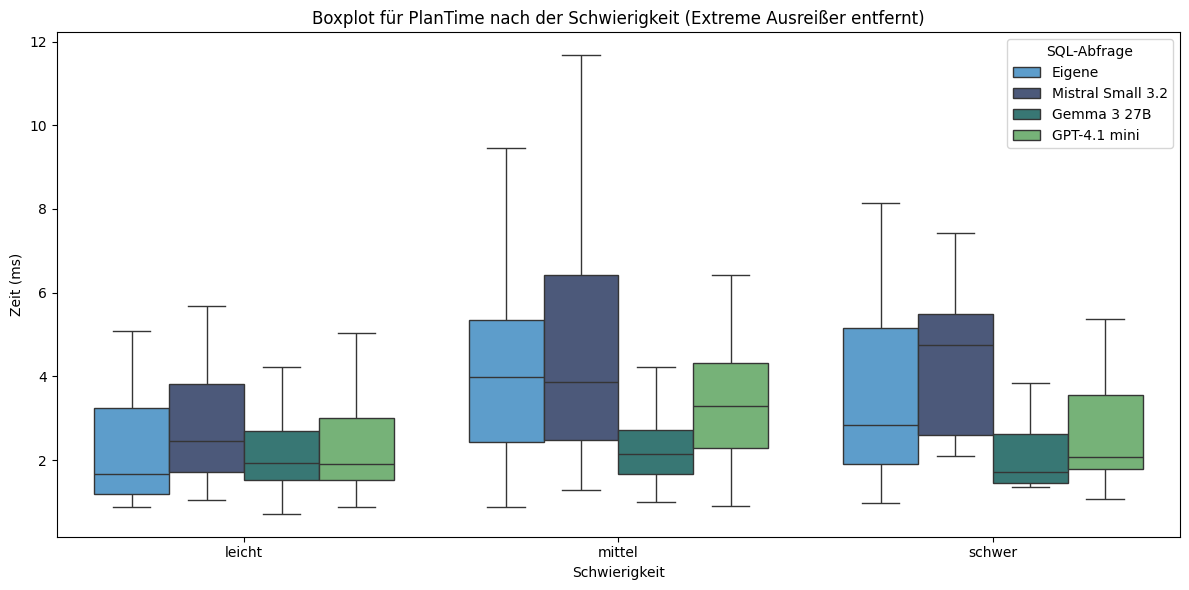

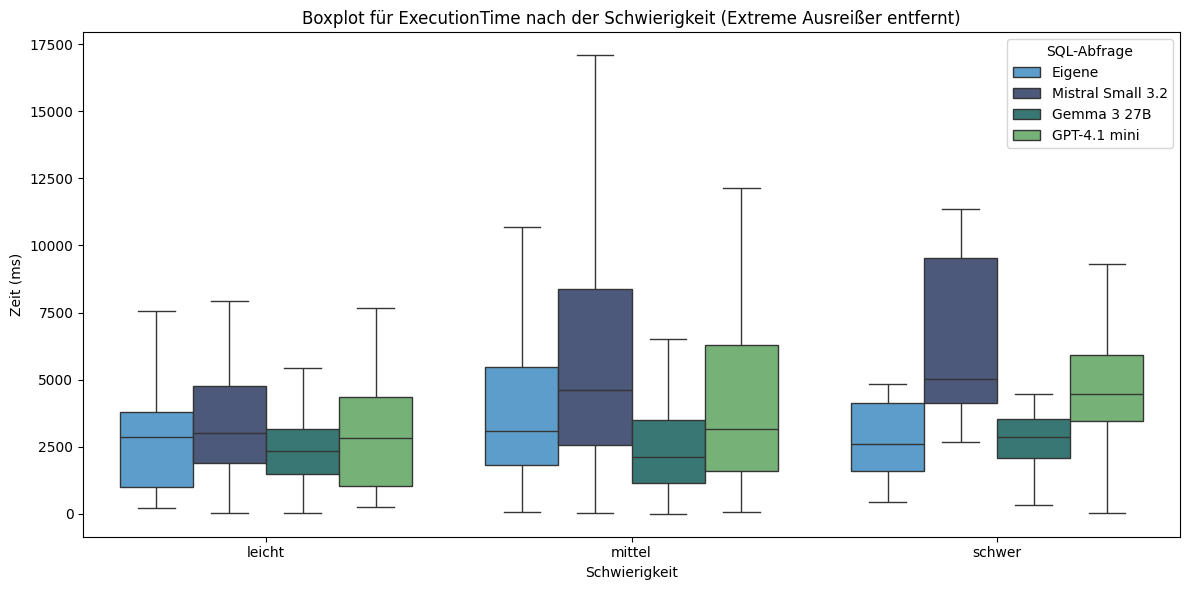

In [29]:
# Folgender Code entfernt extreme Ausreißer basierend auf dem IQR (Interquartilsabstand) und mithilfe von CoPilot erstellt.

# Remove extreme outliers (IQR) per Metric and LLM and re-plot
# This trims values beyond [Q1 - 1.5*IQR, Q3 + 1.5*IQR] within each (Metric, LLM) group.

def remove_outliers_iqr(df: pd.DataFrame, group_cols: list[str], value_col: str, k: float = 1.5) -> pd.DataFrame:
    grouped = df.groupby(group_cols)[value_col]
    q1 = grouped.quantile(0.25)
    q3 = grouped.quantile(0.75)
    bounds = pd.concat([q1.rename("q1"), q3.rename("q3")], axis=1)
    bounds["iqr"] = bounds["q3"] - bounds["q1"]
    bounds["lower"] = bounds["q1"] - k * bounds["iqr"]
    bounds["upper"] = bounds["q3"] + k * bounds["iqr"]

    # Join bounds back to the original frame
    df_b = df.join(bounds[["lower", "upper"]], on=group_cols)
    mask = df_b[value_col].between(df_b["lower"], df_b["upper"]) | (~df_b[value_col].notna())

    removed = (~mask & df_b[value_col].notna()).sum()
    total = df_b[value_col].notna().sum()
    if total > 0:
        print(f"Removed {removed} extreme values ({removed/total:.1%}) using IQR (k={k}).")
    else:
        print("No values to filter.")

    # Return only original columns
    return df_b.loc[mask, df.columns]

# Apply filtering and re-plot
df_boxplot_clean = remove_outliers_iqr(df_boxplot, ["Metric", "LLM"], "Value", k=1.5)

for metric in ["PlanTime", "ExecutionTime"]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_boxplot_clean[df_boxplot_clean["Metric"] == metric],
        x="Schwierigkeit",
        y="Value",
        hue="LLM",
        hue_order=hue_order,
        palette=farben,
        showfliers=False,
    )
    plt.title(f"Boxplot für {metric} nach der Schwierigkeit (Extreme Ausreißer entfernt)")
    plt.xlabel("Schwierigkeit")
    plt.ylabel("Zeit (ms)")
    plt.legend(title="SQL-Abfrage")
    plt.tight_layout()
    plt.show()

# Semantische Ähnlichkeit der genierten SQL zu Gold-SQL

In [32]:
df = load_excel_data("../questions/questions.xlsx")
df = df[:-1]

In [33]:
farben = {
    "Eigene": "#4aa0de",
    "Mistral Small 3.2": "#455681",
    "Gemma 3 27B": "#2d827e",
    "GPT-4.1 mini": "#6cbc6e"
}
hue_order = list(farben.keys())

In [34]:
df.columns

Index(['Frage', 'GoldenSQL', 'GoldenDaten', 'GoldenPlanTime',
       'GoldenExecutionTime', 'MistralSQL', 'MistralDaten', 'MistralPlanTime',
       'MistralExecutionTime', 'GoogleSQL', 'GoogleDaten', 'GooglePlanTime',
       'GoogleExecutionTime', 'OpenaiSQL', 'OpenaiDaten', 'OpenaiPlanTime',
       'OpenaiExecutionTime', 'MistralInterpretation', 'MistralVotes',
       'MistralScore', 'GoogleInterpretation', 'GoogleVotes', 'GoogleScore',
       'OpenaiInterpretation', 'OpenaiVotes', 'OpenaiScore', 'Reasoning',
       'MistralSQLSemanticVotes', 'MistralSQLSemanticScore',
       'MistralSQLSemanticReasoning', 'GoogleSQLSemanticVotes',
       'GoogleSQLSemanticScore', 'GoogleSQLSemanticReasoning',
       'OpenaiSQLSemanticVotes', 'OpenaiSQLSemanticScore',
       'OpenaiSQLSemanticReasoning', 'Precision_Mistral', 'Precision_Google',
       'Precision_OpenAI', 'Recall_Mistral', 'Recall_Google', 'Recall_OpenAI',
       'has_window', 'has_gapfill', 'has_time_bucket', 'has_stats_agg',
       '

In [35]:
df_semantic = df[["MistralSQLSemanticScore", "GoogleSQLSemanticScore", "OpenaiSQLSemanticScore", "score_bin"]]

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1705327235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semantic.rename(columns={
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1705327235.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben)


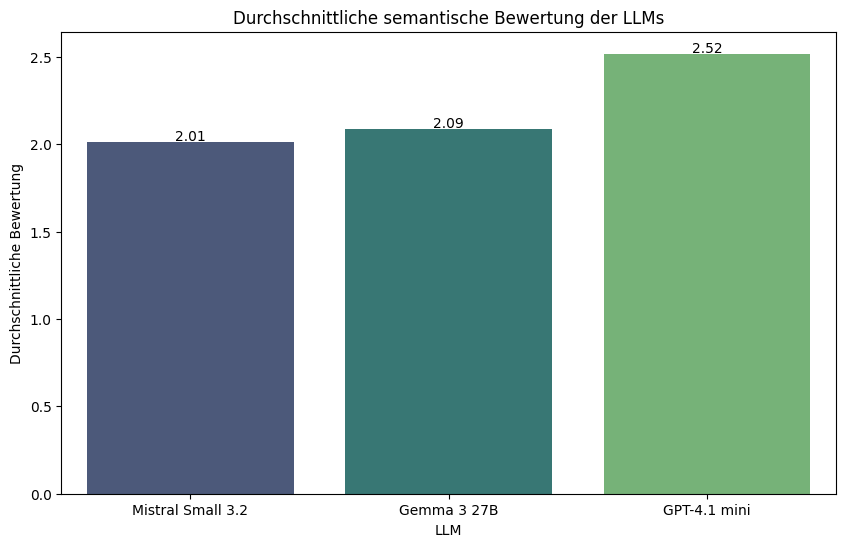

In [36]:
df_semantic.rename(columns={
    "MistralSQLSemanticScore": "Mistral Small 3.2",
    "GoogleSQLSemanticScore": "Gemma 3 27B",
    "OpenaiSQLSemanticScore": "GPT-4.1 mini"
}, inplace=True)

numeric_cols = ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"]
mean_scores = df_semantic[numeric_cols].mean()
plt.figure(figsize=(10, 6))
plt.title("Durchschnittliche semantische Bewertung der LLMs")
plt.ylabel("Durchschnittliche Bewertung")
plt.xlabel("LLM")
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben)
for i, v in enumerate(mean_scores.values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


In [13]:
df_semantic.columns


Index(['Mistral Small 3.2', 'Gemma 3 27B', 'GPT-4.1 mini', 'score_bin'], dtype='object')

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\3512033571.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


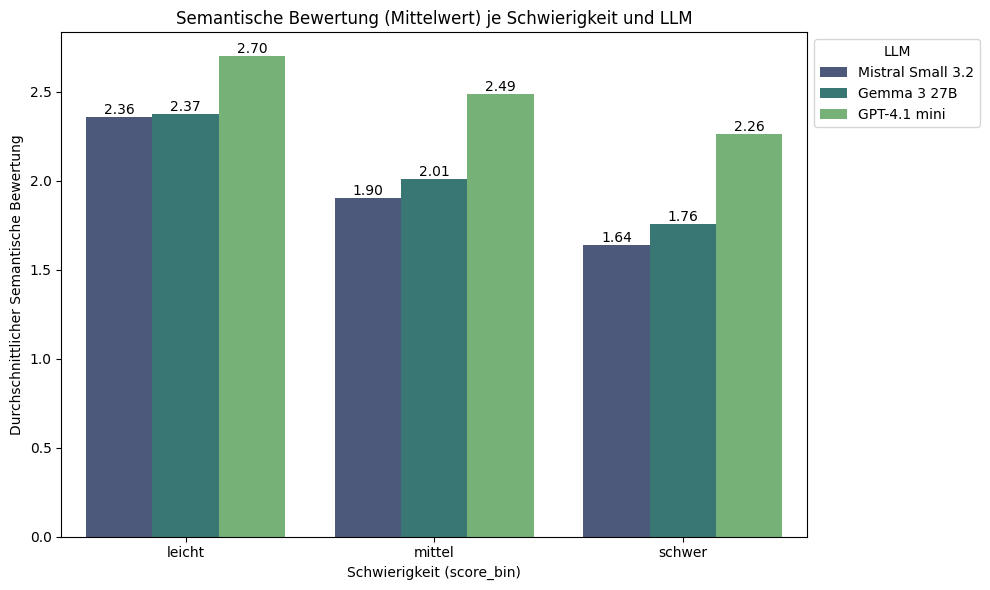

In [37]:
# Folgender Codeabschnitt wurd mit Hilfe von Copilot erstellt.

# Summary: mean semantic score per score_bin and LLM
numeric_cols = ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"]

# Compute means per score_bin
summary_by_bin = (
    df_semantic
    .groupby("score_bin", dropna=False)[numeric_cols]
    .mean()
    .reset_index()
    .rename(columns={"score_bin": "Schwierigkeit"})
)

# Tidy format for plotting
summary_tidy = summary_by_bin.melt(
    id_vars="Schwierigkeit", var_name="LLM", value_name="MeanScore"
)

# Plot grouped bar chart (uses predefined 'farben' and 'hue_order')
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=summary_tidy,
    x="Schwierigkeit",
    y="MeanScore",
    hue="LLM",
    hue_order=[c for c in ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"] if c in summary_tidy["LLM"].unique()],
    palette=farben,
    ci=None,
)
plt.title("Semantische Bewertung (Mittelwert) je Schwierigkeit und LLM")
plt.xlabel("Schwierigkeit (score_bin)")
plt.ylabel("Durchschnittlicher Semantische Bewertung")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Labels on bars
for p in plt.gca().patches:
    if p.get_height() == 0:
        plt.annotate("", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    else:
        plt.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)


plt.tight_layout()
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\2304680379.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben, ax=ax0)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\2304680379.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


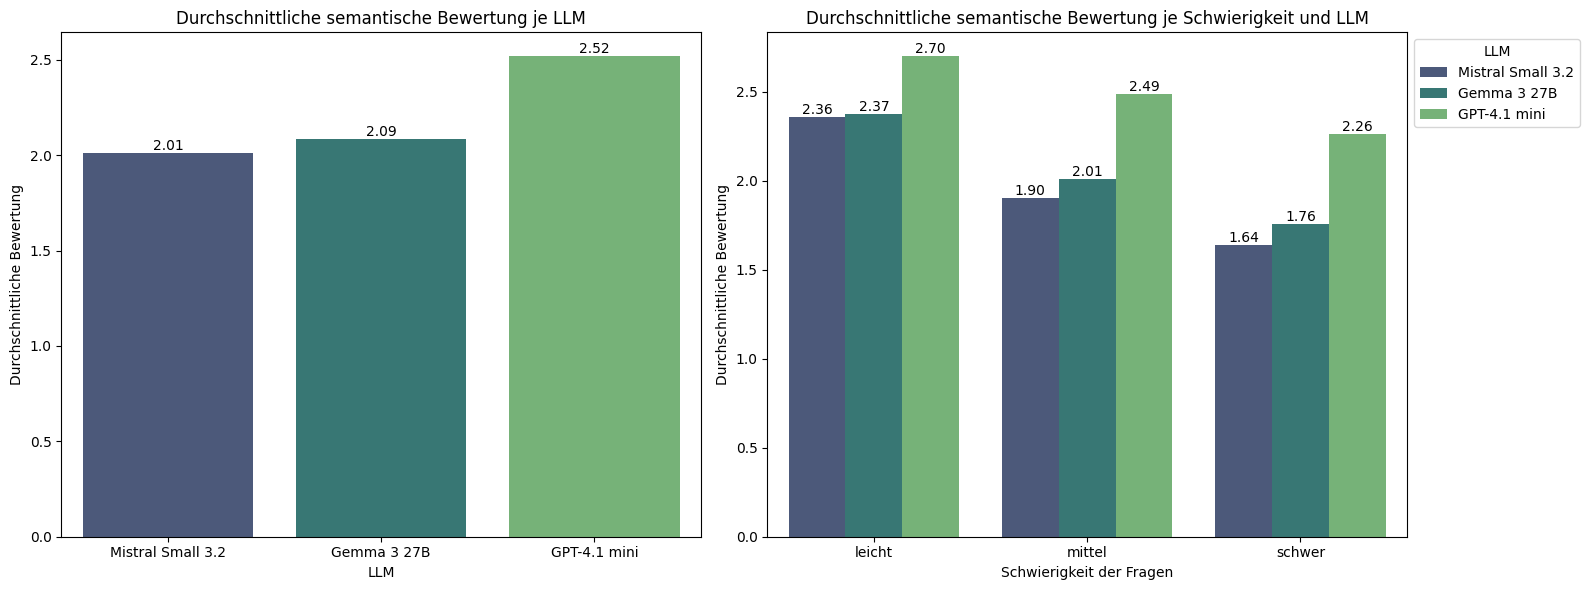

In [38]:
# Folgender Codeabschnitt wurde mit Copilot erstellt.
# Build the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: overall mean per LLM
ax0 = axes[0]
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben, ax=ax0)
ax0.set_title("Durchschnittliche semantische Bewertung je LLM")
ax0.set_xlabel("LLM")
ax0.set_ylabel("Durchschnittliche Bewertung")
for c in ax0.containers:
    ax0.bar_label(c, fmt="%.2f")

# Right: mean per score_bin and LLM
ax1 = axes[1]
hue_order = [c for c in ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"] if c in summary_tidy["LLM"].unique()]
sns.barplot(
    data=summary_tidy,
    x="Schwierigkeit",
    y="MeanScore",
    hue="LLM",
    hue_order=hue_order,
    palette=farben,
    ci=None,
    ax=ax1,
)
ax1.set_title("Durchschnittliche semantische Bewertung je Schwierigkeit und LLM")
ax1.set_xlabel("Schwierigkeit der Fragen")
ax1.set_ylabel("Durchschnittliche Bewertung")
# Put legend outside to the right
ax1.legend(title="LLM", loc="upper left", bbox_to_anchor=(1, 1))
for c in ax1.containers:
    ax1.bar_label(c, fmt="%.2f")

plt.tight_layout()
plt.show()

# Bewertung der Interpretation von den generierten Texten

In [ ]:
df = load_excel_data("../questions/questions.xlsx")
df = df[:-1]

In [39]:
farben = {
    "Eigene": "#4aa0de",
    "Mistral Small 3.2": "#455681",
    "Gemma 3 27B": "#2d827e",
    "GPT-4.1 mini": "#6cbc6e"
}
hue_order = list(farben.keys())

In [40]:
df.columns

Index(['Frage', 'GoldenSQL', 'GoldenDaten', 'GoldenPlanTime',
       'GoldenExecutionTime', 'MistralSQL', 'MistralDaten', 'MistralPlanTime',
       'MistralExecutionTime', 'GoogleSQL', 'GoogleDaten', 'GooglePlanTime',
       'GoogleExecutionTime', 'OpenaiSQL', 'OpenaiDaten', 'OpenaiPlanTime',
       'OpenaiExecutionTime', 'MistralInterpretation', 'MistralVotes',
       'MistralScore', 'GoogleInterpretation', 'GoogleVotes', 'GoogleScore',
       'OpenaiInterpretation', 'OpenaiVotes', 'OpenaiScore', 'Reasoning',
       'MistralSQLSemanticVotes', 'MistralSQLSemanticScore',
       'MistralSQLSemanticReasoning', 'GoogleSQLSemanticVotes',
       'GoogleSQLSemanticScore', 'GoogleSQLSemanticReasoning',
       'OpenaiSQLSemanticVotes', 'OpenaiSQLSemanticScore',
       'OpenaiSQLSemanticReasoning', 'Precision_Mistral', 'Precision_Google',
       'Precision_OpenAI', 'Recall_Mistral', 'Recall_Google', 'Recall_OpenAI',
       'has_window', 'has_gapfill', 'has_time_bucket', 'has_stats_agg',
       '

In [41]:
df_interpretation = df[["MistralScore", "GoogleScore", "OpenaiScore", "score_bin"]]

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\4260279111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpretation.rename(columns={
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\4260279111.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben)


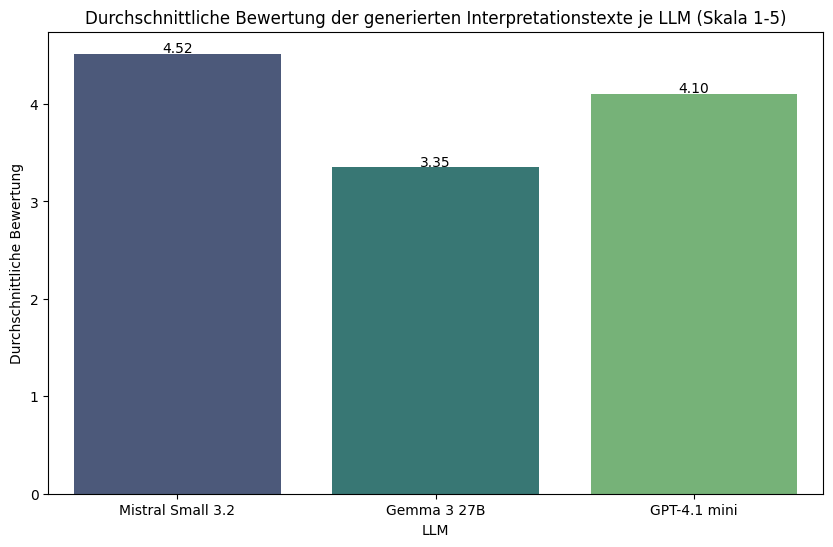

In [42]:
df_interpretation.rename(columns={
    "MistralScore": "Mistral Small 3.2",
    "GoogleScore": "Gemma 3 27B",
    "OpenaiScore": "GPT-4.1 mini"
}, inplace=True)

numeric_cols = ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"]
mean_scores = df_interpretation[numeric_cols].mean()
plt.figure(figsize=(10, 6))
plt.title("Durchschnittliche Bewertung der generierten Interpretationstexte je LLM (Skala 1-5)")
plt.ylabel("Durchschnittliche Bewertung")
plt.xlabel("LLM")
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben)
for i, v in enumerate(mean_scores.values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')


C:\Users\samue\AppData\Local\Temp\ipykernel_32328\2118562100.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


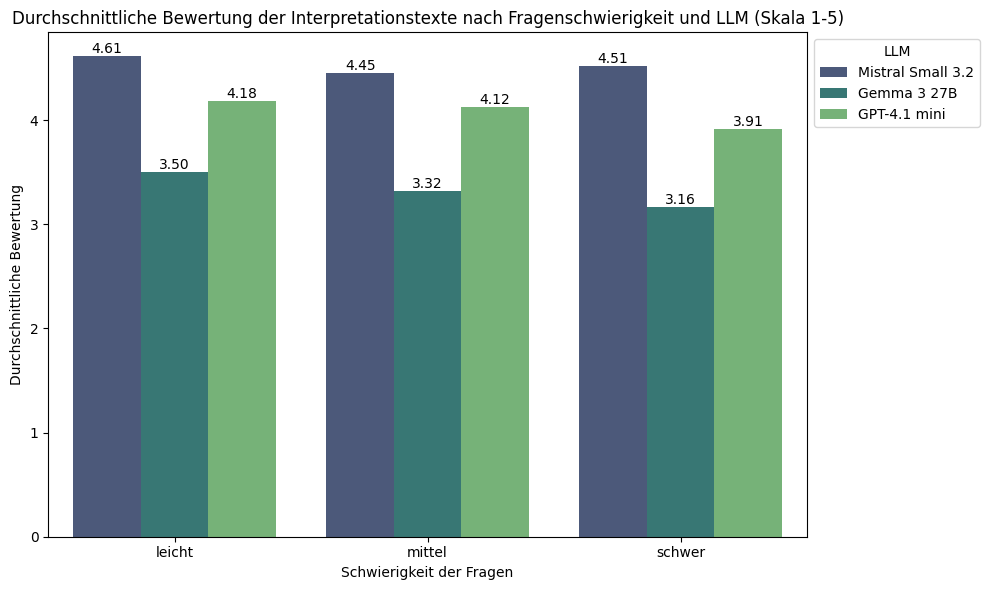

In [43]:
# Folgender Codeabschnitt wurd mit Hilfe von Copilot erstellt.

# Summary: mean semantic score per score_bin and LLM
numeric_cols = ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"]

# Compute means per score_bin
summary_by_bin = (
    df_interpretation
    .groupby("score_bin", dropna=False)[numeric_cols]
    .mean()
    .reset_index()
    .rename(columns={"score_bin": "Schwierigkeit"})
)

# Tidy format for plotting
summary_tidy = summary_by_bin.melt(
    id_vars="Schwierigkeit", var_name="LLM", value_name="MeanScore"
)

# Plot grouped bar chart (uses predefined 'farben' and 'hue_order')
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=summary_tidy,
    x="Schwierigkeit",
    y="MeanScore",
    hue="LLM",
    hue_order=[c for c in ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"] if c in summary_tidy["LLM"].unique()],
    palette=farben,
    ci=None,
)
plt.title("Durchschnittliche Bewertung der Interpretationstexte nach Fragenschwierigkeit und LLM (Skala 1-5)")
plt.xlabel("Schwierigkeit der Fragen")
plt.ylabel("Durchschnittliche Bewertung")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Labels on bars
for p in plt.gca().patches:
    if p.get_height() == 0:
        plt.annotate("", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    else:
        plt.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', rotation=0)


plt.tight_layout()
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\4236709529.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben, ax=ax0)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\4236709529.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


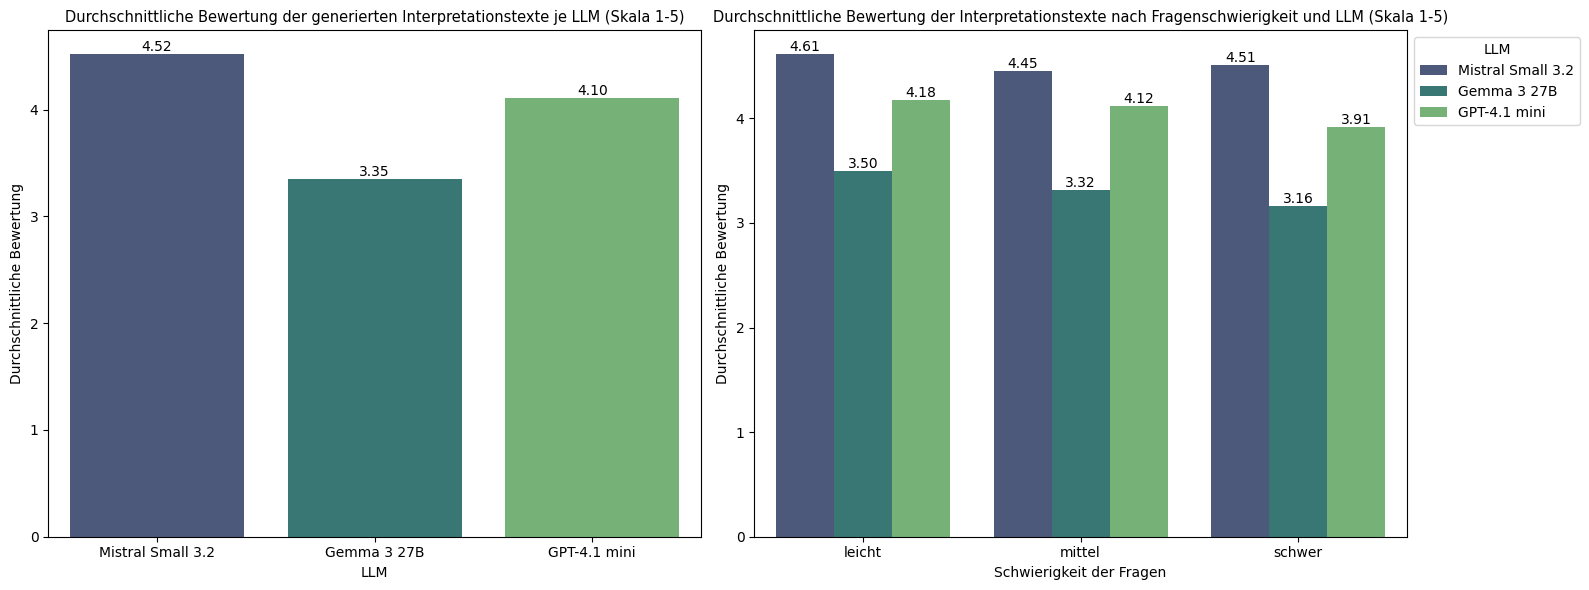

In [44]:
# Folgender Codeabschnitt wurde mit Copilot erstellt.
# Build the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: overall mean per LLM
ax0 = axes[0]
sns.barplot(x=mean_scores.index, y=mean_scores.values, palette=farben, ax=ax0)
ax0.set_title("Durchschnittliche Bewertung der generierten Interpretationstexte je LLM (Skala 1-5)")
ax0.title.set_fontsize(10.5)
ax0.set_xlabel("LLM")
ax0.set_ylabel("Durchschnittliche Bewertung")
for c in ax0.containers:
    ax0.bar_label(c, fmt="%.2f")

# Right: mean per score_bin and LLM
ax1 = axes[1]
hue_order = [c for c in ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"] if c in summary_tidy["LLM"].unique()]
sns.barplot(
    data=summary_tidy,
    x="Schwierigkeit",
    y="MeanScore",
    hue="LLM",
    hue_order=hue_order,
    palette=farben,
    ci=None,
    ax=ax1,
)
ax1.set_title("Durchschnittliche Bewertung der Interpretationstexte nach Fragenschwierigkeit und LLM (Skala 1-5)")
#smaller font size for title
ax1.title.set_fontsize(10.5)
ax1.set_xlabel("Schwierigkeit der Fragen")
ax1.set_ylabel("Durchschnittliche Bewertung")
# Put legend outside to the right
ax1.legend(title="LLM", loc="upper left", bbox_to_anchor=(1, 1))
for c in ax1.containers:
    ax1.bar_label(c, fmt="%.2f")

plt.tight_layout()
plt.show()

# Precision und Recall


In [45]:
df = load_excel_data("../questions/questions.xlsx")
df = df[:-1]

In [46]:
farben = {
    "Eigene": "#4aa0de",
    "Mistral Small 3.2": "#455681",
    "Gemma 3 27B": "#2d827e",
    "GPT-4.1 mini": "#6cbc6e"
}
hue_order = list(farben.keys())

In [47]:
df.columns

Index(['Frage', 'GoldenSQL', 'GoldenDaten', 'GoldenPlanTime',
       'GoldenExecutionTime', 'MistralSQL', 'MistralDaten', 'MistralPlanTime',
       'MistralExecutionTime', 'GoogleSQL', 'GoogleDaten', 'GooglePlanTime',
       'GoogleExecutionTime', 'OpenaiSQL', 'OpenaiDaten', 'OpenaiPlanTime',
       'OpenaiExecutionTime', 'MistralInterpretation', 'MistralVotes',
       'MistralScore', 'GoogleInterpretation', 'GoogleVotes', 'GoogleScore',
       'OpenaiInterpretation', 'OpenaiVotes', 'OpenaiScore', 'Reasoning',
       'MistralSQLSemanticVotes', 'MistralSQLSemanticScore',
       'MistralSQLSemanticReasoning', 'GoogleSQLSemanticVotes',
       'GoogleSQLSemanticScore', 'GoogleSQLSemanticReasoning',
       'OpenaiSQLSemanticVotes', 'OpenaiSQLSemanticScore',
       'OpenaiSQLSemanticReasoning', 'Precision_Mistral', 'Precision_Google',
       'Precision_OpenAI', 'Recall_Mistral', 'Recall_Google', 'Recall_OpenAI',
       'has_window', 'has_gapfill', 'has_time_bucket', 'has_stats_agg',
       '

In [49]:
df_recall_n_precision = df[["Precision_Mistral", "Precision_Google", "Precision_OpenAI", "Recall_Mistral", "Recall_Google", "Recall_OpenAI", "score_bin"]]

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\3673912520.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mean_precision.keys()), y=list(mean_precision.values()), palette=farben, ax=ax)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\3673912520.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mean_recall.keys()), y=list(mean_recall.values()), palette=farben, ax=ax)


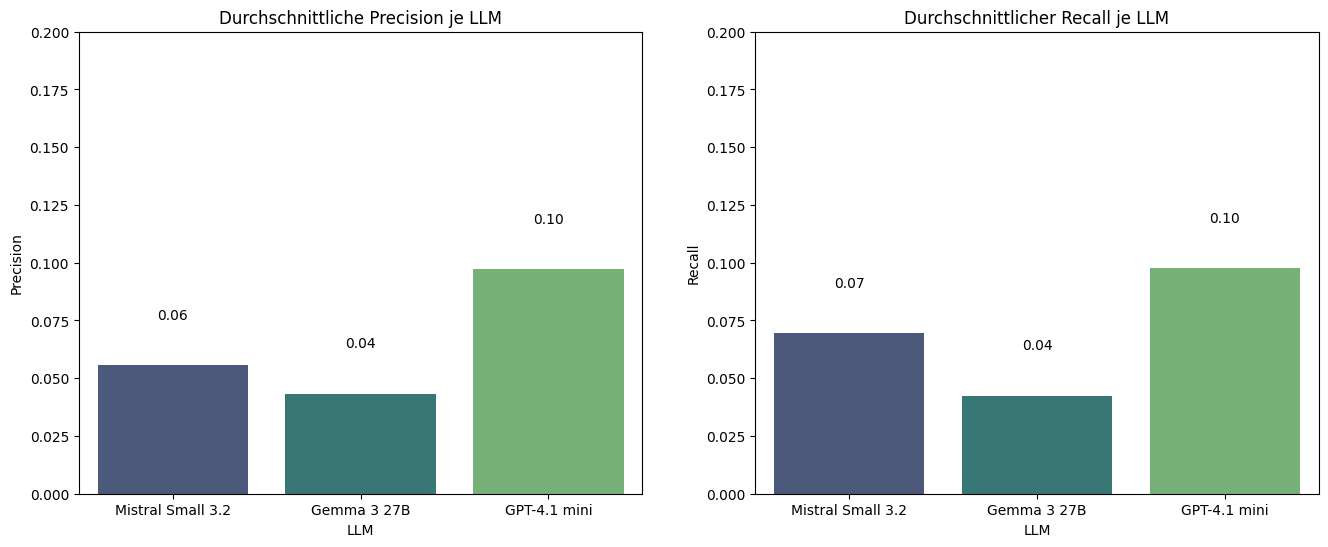

In [55]:
mean_precision = {
    "Mistral Small 3.2": df_recall_n_precision["Precision_Mistral"].mean(),
    "Gemma 3 27B": df_recall_n_precision["Precision_Google"].mean(),
    "GPT-4.1 mini": df_recall_n_precision["Precision_OpenAI"].mean()
}

mean_recall = {
    "Mistral Small 3.2": df_recall_n_precision["Recall_Mistral"].mean(),
    "Gemma 3 27B": df_recall_n_precision["Recall_Google"].mean(),
    "GPT-4.1 mini": df_recall_n_precision["Recall_OpenAI"].mean()
}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
ax = axes[0]
sns.barplot(x=list(mean_precision.keys()), y=list(mean_precision.values()), palette=farben, ax=ax)
ax.set_title("Durchschnittliche Precision je LLM")
ax.set_ylabel("Precision")
ax.set_ylim(0, 0.2)
ax.set_xlabel("LLM")
for i, v in enumerate(mean_precision.values()):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center')


ax = axes[1]
sns.barplot(x=list(mean_recall.keys()), y=list(mean_recall.values()), palette=farben, ax=ax)
ax.set_title("Durchschnittlicher Recall je LLM")
ax.set_ylabel("Recall")
ax.set_ylim(0, 0.2)
ax.set_xlabel("LLM")
for i, v in enumerate(mean_recall.values()):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center')



C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1215169504.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Schwierigkeit"] = pd.Categorical(sub["Schwierigkeit"], categories=order_schwierigkeit, ordered=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1215169504.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1215169504.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su

C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1215169504.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Schwierigkeit"] = pd.Categorical(sub["Schwierigkeit"], categories=order_schwierigkeit, ordered=True)
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1215169504.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\samue\AppData\Local\Temp\ipykernel_32328\1215169504.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su

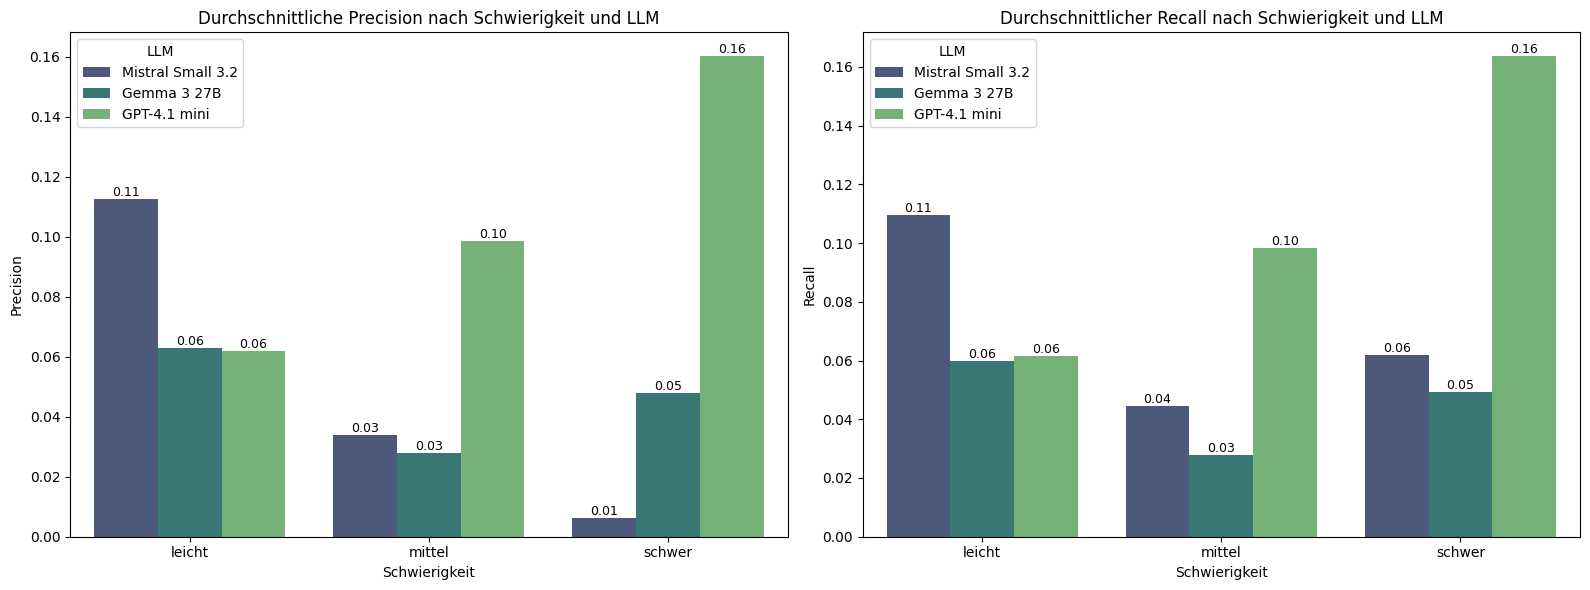

In [56]:
# Durchschnittliche Precision und Recall nach Schwierigkeit und LLM
# Folgender Codeabschnitt wurde mit Copilot erstellt.

# Prepare a tidy dataframe with score_bin, metric (Precision/Recall), value, LLM
prec_cols = {
    "Precision_Mistral": "Mistral Small 3.2",
    "Precision_Google": "Gemma 3 27B",
    "Precision_OpenAI": "GPT-4.1 mini",
}
rec_cols = {
    "Recall_Mistral": "Mistral Small 3.2",
    "Recall_Google": "Gemma 3 27B",
    "Recall_OpenAI": "GPT-4.1 mini",
}

# Build long frames
prec_long = (
    df[["score_bin", *prec_cols.keys()]]
    .rename(columns=prec_cols)
    .melt(id_vars=["score_bin"], var_name="LLM", value_name="Wert")
)
prec_long["Metrik"] = "Precision"

rec_long = (
    df[["score_bin", *rec_cols.keys()]]
    .rename(columns=rec_cols)
    .melt(id_vars=["score_bin"], var_name="LLM", value_name="Wert")
)
rec_long["Metrik"] = "Recall"

long_all = pd.concat([prec_long, rec_long], ignore_index=True)

# Compute mean by (score_bin, LLM, Metrik)
summary = (
    long_all
    .groupby(["score_bin", "LLM", "Metrik"], dropna=False)["Wert"]
    .mean()
    .reset_index()
    .rename(columns={"score_bin": "Schwierigkeit"})
)

# Plot: two subplots side by side for Precision and Recall
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Precision
ax = axes[0]
sub = summary[summary["Metrik"] == "Precision"]
order_schwierigkeit = ["leicht", "mittel", "schwer"]
try:
    sub["Schwierigkeit"] = pd.Categorical(sub["Schwierigkeit"], categories=order_schwierigkeit, ordered=True)
except Exception:
    pass
sns.barplot(
    data=sub,
    x="Schwierigkeit",
    y="Wert",
    hue="LLM",
    hue_order=[c for c in ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"] if c in sub["LLM"].unique()],
    palette=farben,
    ci=None,
    ax=ax,
)
ax.set_title("Durchschnittliche Precision nach Schwierigkeit und LLM")
ax.set_xlabel("Schwierigkeit")
ax.set_ylabel("Precision")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

# Recall
ax = axes[1]
sub = summary[summary["Metrik"] == "Recall"]
try:
    sub["Schwierigkeit"] = pd.Categorical(sub["Schwierigkeit"], categories=order_schwierigkeit, ordered=True)
except Exception:
    pass
sns.barplot(
    data=sub,
    x="Schwierigkeit",
    y="Wert",
    hue="LLM",
    hue_order=[c for c in ["Mistral Small 3.2", "Gemma 3 27B", "GPT-4.1 mini"] if c in sub["LLM"].unique()],
    palette=farben,
    ci=None,
    ax=ax,
)
ax.set_title("Durchschnittlicher Recall nach Schwierigkeit und LLM")
ax.set_xlabel("Schwierigkeit")
ax.set_ylabel("Recall")
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
mistral_perc = df["MistralDaten"].isnull().mean() * 100
google_perc = df["GoogleDaten"].isnull().mean() * 100
openai_perc = df["OpenaiDaten"].isnull().mean() * 100
print(f"MistralDaten: {mistral_perc:.2f}% null")
print(f"GoogleDaten: {google_perc:.2f}% null")
print(f"OpenaiDaten: {openai_perc:.2f}% null")
mistral_null = df["MistralDaten"].isnull().sum()
google_null = df["GoogleDaten"].isnull().sum()
openai_null = df["OpenaiDaten"].isnull().sum()
print(f"MistralDaten: {mistral_null} null")
print(f"GoogleDaten: {google_null} null")
print(f"OpenaiDaten: {openai_null} null")

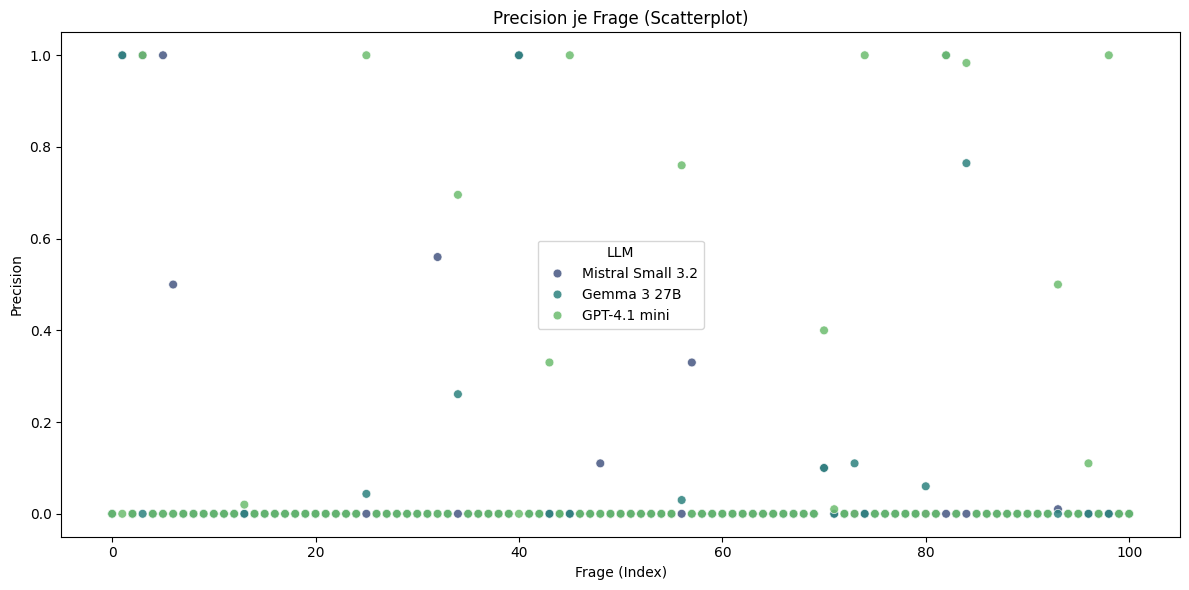

In [34]:
# Scatterplot of Precision per question, labeled by LLM
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure color palette exists
if 'farben' not in globals():
    farben = {
        "Eigene": "#4aa0de",
        "Mistral Small 3.2": "#455681",
        "Gemma 3 27B": "#2d827e",
        "GPT-4.1 mini": "#6cbc6e",
    }

# Column mapping: LLM -> precision column
col_map = {
    "Mistral Small 3.2": "Precision_Mistral",
    "Gemma 3 27B": "Precision_Google",
    "GPT-4.1 mini": "Precision_OpenAI",
}

# Filter to available columns
available = {llm: col for llm, col in col_map.items() if col in df.columns}
if not available:
    print("No Precision_* columns found in df.")
else:
    n = len(df)
    rows = []
    for llm, col in available.items():
        vals = pd.to_numeric(df[col], errors='coerce').to_numpy()
        for i in range(n):
            v = vals[i]
            if not (v is None or np.isnan(v)):
                rows.append((i, llm, float(v)))
    long = pd.DataFrame(rows, columns=["Frage", "LLM", "Precision"])  # Frage = row index

    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=long,
        x="Frage",
        y="Precision",
        hue="LLM",
        palette={k: v for k, v in farben.items() if k in long["LLM"].unique()},
        s=40,
        alpha=0.85,
    )
    plt.title("Precision je Frage (Scatterplot)")
    plt.xlabel("Frage (Index)")
    plt.ylabel("Precision")

    # Annotate each point with LLM name (small font)
    #ax = plt.gca()
    #for _, r in long.iterrows():
    #    ax.text(r["Frage"], r["Precision"], r["LLM"], fontsize=6, alpha=0.7, ha="left", va="bottom")

    plt.tight_layout()
    plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_46972\1666302517.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(data=long_df, x="LLM", y="Precision", order=llm_order, palette=palette, size=5)
C:\Users\samue\AppData\Local\Temp\ipykernel_46972\1666302517.py:47: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


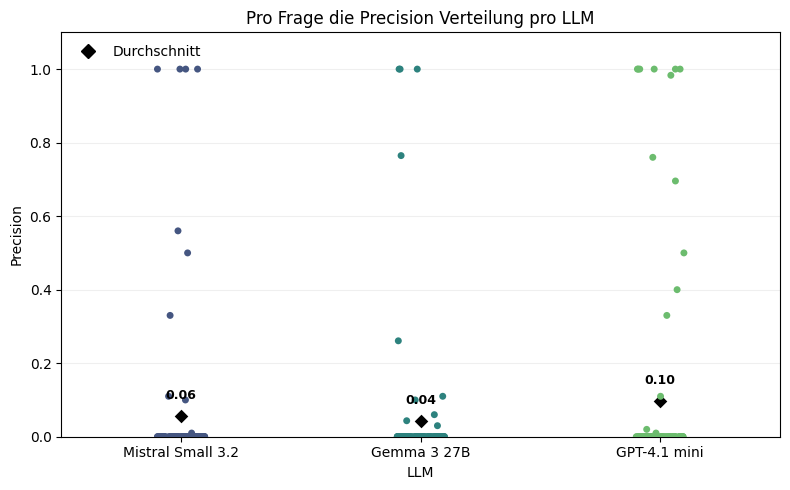

In [46]:
# Foglender Codeabschnitt wurde mithilfe von Copliot erstellt
# Ensure df exists
try:
    _df = df.copy()
except NameError:
    print("DataFrame 'df' not found. Please run the data loading cell first.")
    _df = None

if _df is not None:
    # Collect available precision columns
    llm_columns = [
        ("Mistral Small 3.2", "Precision_Mistral"),
        ("Gemma 3 27B", "Precision_Google"),
        ("GPT-4.1 mini", "Precision_OpenAI"),
    ]
    llm_columns = [(name, col) for name, col in llm_columns if col in _df.columns]

    if not llm_columns:
        print("No Precision_* columns found in df. Expected one or more of: 'Precision_Mistral', 'Precision_Google', 'Precision_OpenAI'.")
    else:
        # Build long-form DataFrame: columns -> rows
        rows = []
        for idx in _df.index:
            for name, col in llm_columns:
                val = _df.at[idx, col]
                if pd.notna(val):
                    rows.append({"Frage": idx, "LLM": name, "Precision": float(val)})
        long_df = pd.DataFrame(rows)

        # Visualize: LLM on x-axis
        llm_order = [name for name, _ in llm_columns]
        palette = {"Mistral Small 3.2": "#455681",
        "Gemma 3 27B": "#2d827e",
        "GPT-4.1 mini": "#6cbc6e"}
        palette = {k: v for k, v in palette.items() if k in llm_order}

        plt.figure(figsize=(8, 5))
        ax = sns.stripplot(data=long_df, x="LLM", y="Precision", order=llm_order, palette=palette, size=5)

        # Overlay: mean marker per LLM (black diamond)
        sns.pointplot(
            data=long_df,
            x="LLM",
            y="Precision",
            order=llm_order,
            estimator=np.mean,
            errorbar=None,
            markers="D",
            color="black",
            linestyles="",
            scale=0.9,
            ax=ax,
        )

        # Compute means for annotation
        means = long_df.groupby("LLM")["Precision"].mean()

        # Add legend entry for the mean marker
        mean_handle = Line2D([0], [0], marker='D', color='black', linestyle='None', markersize=7, label='Durchschnitt')
        ax.legend(handles=[mean_handle], loc='upper left', frameon=False)

        # Annotate mean values above the mean markers
        for i, name in enumerate(llm_order):
            if name in means:
                m = means[name]
                ax.annotate(f"{m:.2f}",
                            xy=(i, m),
                            xytext=(0, 10),
                            textcoords="offset points",
                            ha="center", va="bottom",
                            fontsize=9, color="black", fontweight="bold")

        ax.set_ylim(0, 1.1)
        ax.set_xlabel("LLM")
        ax.set_ylabel("Precision")
        ax.set_title("Pro Frage die Precision Verteilung pro LLM")
        ax.grid(axis="y", alpha=0.2)
        plt.tight_layout()
        plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_46972\3862619443.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=long_prec, x="LLM", y="Precision", order=order_prec, palette=pal_prec, size=5, ax=ax0, jitter=0.4)
C:\Users\samue\AppData\Local\Temp\ipykernel_46972\3862619443.py:45: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=long_prec, x="LLM", y="Precision", order=order_prec, estimator=np.mean, errorbar=None,
C:\Users\samue\AppData\Local\Temp\ipykernel_46972\3862619443.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same

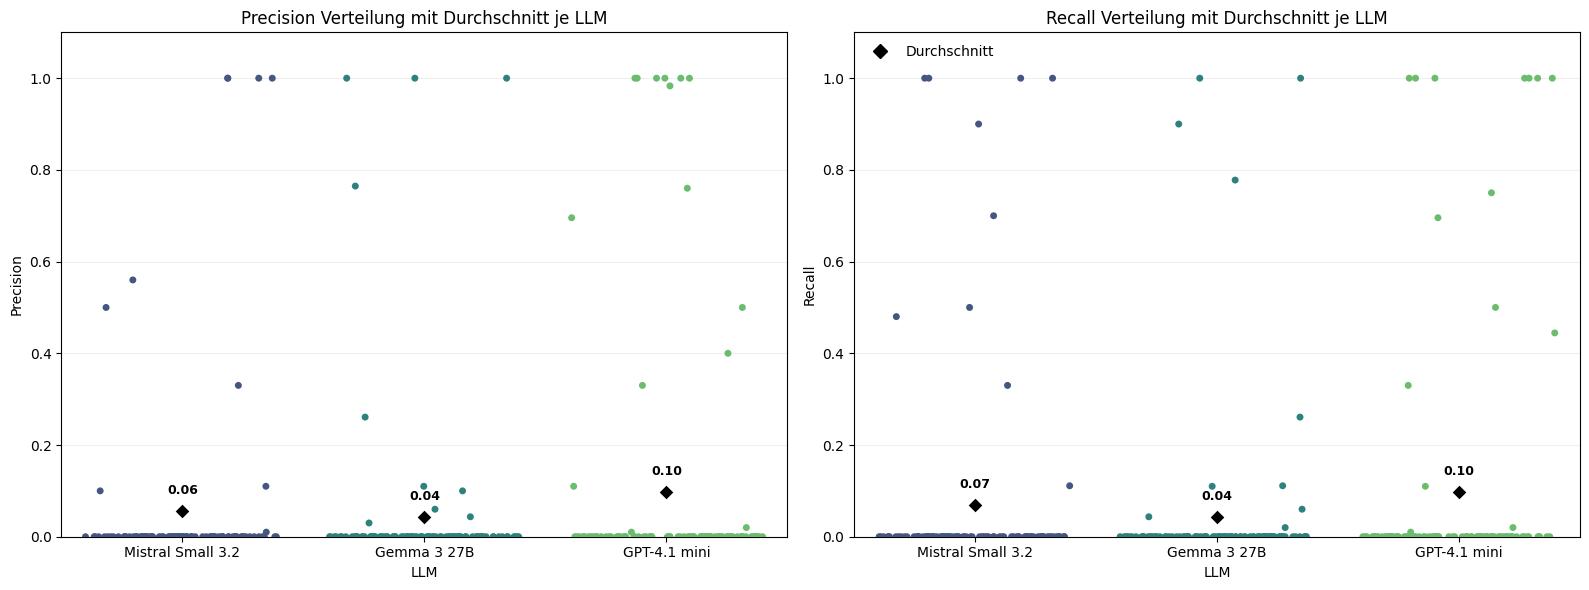

In [66]:
# Foglender Codeabschnitt wurde mithilfe von Copliot erstellt
# Ensure df exists
try:
    _df = df.copy()
except NameError:
    print("DataFrame 'df' not found. Please run the data loading cell first.")
    _df = None

if _df is not None:
    # Collect available columns
    prec_cols = [("Mistral Small 3.2", "Precision_Mistral"), ("Gemma 3 27B", "Precision_Google"), ("GPT-4.1 mini", "Precision_OpenAI")]
    rec_cols  = [("Mistral Small 3.2", "Recall_Mistral"),    ("Gemma 3 27B", "Recall_Google"),    ("GPT-4.1 mini", "Recall_OpenAI")]
    prec_cols = [(n, c) for n, c in prec_cols if c in _df.columns]
    rec_cols  = [(n, c) for n, c in rec_cols  if c in _df.columns]


    # Build long-form data
    rows_prec = []
    for idx in _df.index:
        for name, col in prec_cols:
            v = _df.at[idx, col]
            if pd.notna(v):
                rows_prec.append({"Frage": idx, "LLM": name, "Precision": float(v)})
    long_prec = pd.DataFrame(rows_prec) if rows_prec else pd.DataFrame(columns=["Frage","LLM","Precision"]) 
    rows_rec = []
    for idx in _df.index:
        for name, col in rec_cols:
            v = _df.at[idx, col]
            if pd.notna(v):
                rows_rec.append({"Frage": idx, "LLM": name, "Recall": float(v)})
    long_rec = pd.DataFrame(rows_rec) if rows_rec else pd.DataFrame(columns=["Frage","LLM","Recall"]) 
    # Orders and palette
    order_prec = [n for n, _ in prec_cols]
    order_rec  = [n for n, _ in rec_cols]
    base_palette = {"Mistral Small 3.2": "#455681",
    "Gemma 3 27B": "#2d827e",
    "GPT-4.1 mini": "#6cbc6e"}
    pal_prec = {k: v for k, v in base_palette.items() if k in order_prec}
    pal_rec  = {k: v for k, v in base_palette.items() if k in order_rec}
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
    # Precision subplot
    if not long_prec.empty:
        ax0 = axes[0]
        sns.stripplot(data=long_prec, x="LLM", y="Precision", order=order_prec, palette=pal_prec, size=5, ax=ax0, jitter=0.4)
        sns.pointplot(data=long_prec, x="LLM", y="Precision", order=order_prec, estimator=np.mean, errorbar=None,
                      markers="D", color="black", linestyles="", scale=0.9, ax=ax0)
        means_prec = long_prec.groupby("LLM")["Precision"].mean()
        for i, name in enumerate(order_prec):
            if name in means_prec:
                m = means_prec[name]
                ax0.annotate(f"{m:.2f}", xy=(i, m), xytext=(0, 10), textcoords="offset points",
                             ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")
        ax0.set_title("Precision Verteilung mit Durchschnitt je LLM")
        ax0.set_xlabel("LLM")
        ax0.set_ylabel("Precision")
        ax0.grid(axis="y", alpha=0.2)
    else:
        axes[0].text(0.5, 0.5, "No Precision data", ha='center', va='center')
        axes[0].set_axis_off()
    # Recall subplot
    if not long_rec.empty:
        ax1 = axes[1]
        sns.stripplot(data=long_rec, x="LLM", y="Recall", order=order_rec, palette=pal_rec, size=5, ax=ax1, jitter=0.4)
        sns.pointplot(data=long_rec, x="LLM", y="Recall", order=order_rec, estimator=np.mean, errorbar=None,
                      markers="D", color="black", linestyles="", scale=0.9, ax=ax1)
        means_rec = long_rec.groupby("LLM")["Recall"].mean()
        for i, name in enumerate(order_rec):
            if name in means_rec:
                m = means_rec[name]
                ax1.annotate(f"{m:.2f}", xy=(i, m), xytext=(0, 10), textcoords="offset points",
                             ha="center", va="bottom", fontsize=9, color="black", fontweight="bold")
        ax1.set_title("Recall Verteilung mit Durchschnitt je LLM")
        ax1.set_xlabel("LLM")
        ax1.set_ylabel("Recall")
        ax1.grid(axis="y", alpha=0.2)
    else:
        axes[1].text(0.5, 0.5, "No Recall data", ha='center', va='center')
        axes[1].set_axis_off()
    # Shared Y range and legend for mean marker
    axes[0].set_ylim(0, 1.1)
    axes[1].set_ylim(0, 1.1)
    mean_handle = Line2D([0], [0], marker='D', color='black', linestyle='None', markersize=7, label='Durchschnitt')
    axes[1].legend(handles=[mean_handle], loc='upper left', frameon=False)
    plt.tight_layout()
    plt.show()